In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

training_data = pd.read_csv(r"C:\Users\yuvi\Downloads\training_data.csv")
test_data = pd.read_csv(r"C:\Users\yuvi\Downloads\validation_data.csv")
# test_data.info()

In [2]:
training_data = training_data.drop(['Unnamed: 0', 'song_id', 'avg', 'first_der', 'Spectral_Bandwidth'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'song_id', 'avg', 'first_der', 'Spectral_Bandwidth'], axis=1)

# training_data = training_data[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'label']]
# test_data = test_data[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'label']]

training_features = training_data.drop("label", axis=1)
training_features = training_features.groupby(training_features.index // 5).mean()
training_target = training_data["label"].groupby(training_data.index // 5).first()

test_features = test_data.drop("label", axis=1)
test_features = test_features.groupby(test_features.index // 5).mean()
test_target = test_data["label"].groupby(test_data.index // 5).first()

# test_features = test_data.drop("label", axis=1)
# test_target = test_data["label"]

# training_data = training_data[['song_id', 'avg', 'first_der', 'Spectral_Bandwidth', 'label']]
# test_data = test_data[['song_id', 'avg', 'first_der', 'Spectral_Bandwidth', 'label']]

In [3]:
training_target.describe()

count    334114.000000
mean          4.325063
std           1.375528
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max           6.000000
Name: label, dtype: float64

In [4]:
training_features.fillna(0, inplace=True)
test_features.fillna(0, inplace=True)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83529 entries, 0 to 83528
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       83529 non-null  float64
 1   1       83529 non-null  float64
 2   2       83529 non-null  float64
 3   3       83529 non-null  float64
 4   4       83529 non-null  float64
 5   5       83529 non-null  float64
 6   6       83529 non-null  float64
 7   7       83529 non-null  float64
 8   8       83529 non-null  float64
 9   9       83529 non-null  float64
 10  10      83529 non-null  float64
 11  11      83529 non-null  float64
 12  12      83529 non-null  float64
 13  13      83529 non-null  float64
 14  14      83529 non-null  float64
 15  15      83529 non-null  float64
 16  16      83529 non-null  float64
 17  17      83529 non-null  float64
 18  18      83529 non-null  float64
 19  19      83529 non-null  float64
dtypes: float64(20)
memory usage: 13.4 MB


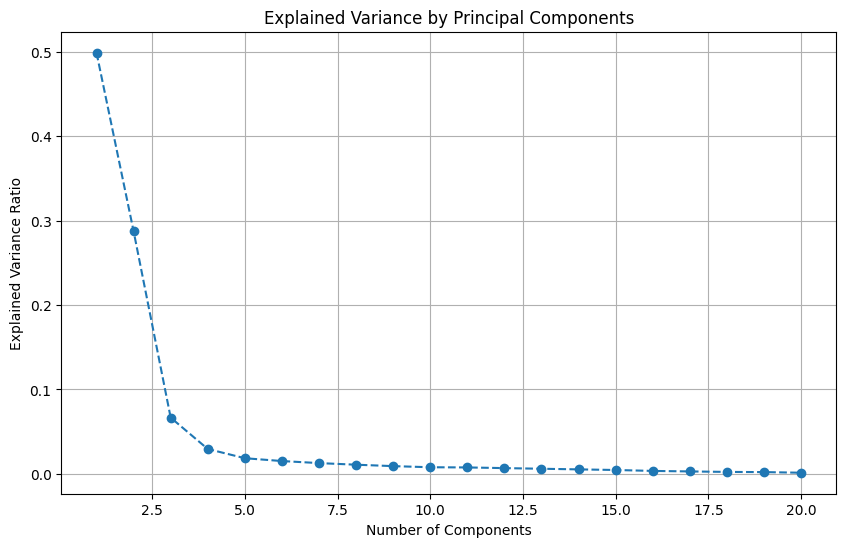

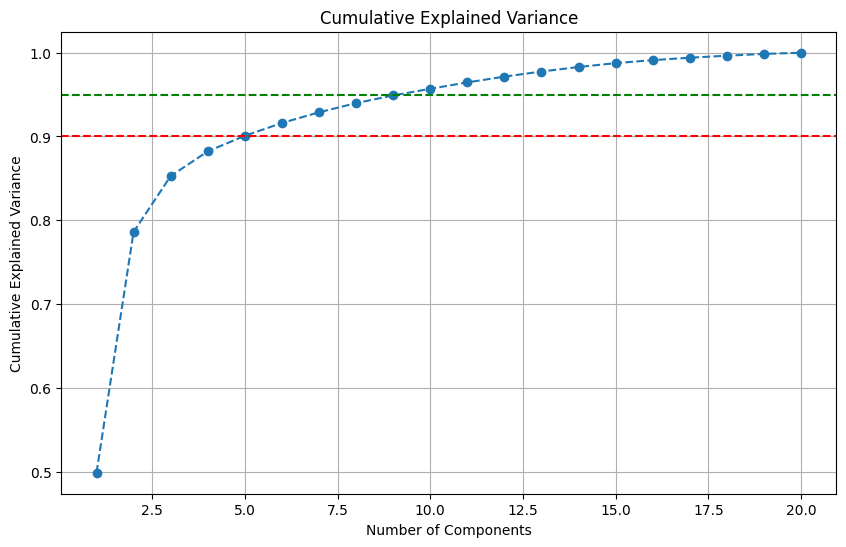

In [5]:
pca = PCA()
pca.fit(training_features)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--')  # Horizontal line for 90% variance
plt.axhline(y=0.95, color='g', linestyle='--')  # Horizontal line for 95% variance
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the training and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(training_features)
X_test_scaled = scaler.transform(test_features)  # Assuming you have test features

# Step 2: Apply PCA on the scaled data
# pca = PCA(n_components=1)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

# model = LogisticRegression()
# model = SVC()
model.fit(X_train_scaled, training_target)

predictions = model.predict(X_test_scaled)

In [8]:
import joblib

joblib.dump(model, 'knn_10features.joblib')

['knn_10features.joblib']

In [ ]:
test_target.fillna(0, inplace=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print performance metrics
accuracy = accuracy_score(test_target, predictions)
precision = precision_score(test_target, predictions, average='weighted')
recall = recall_score(test_target, predictions, average='weighted')
f1 = f1_score(test_target, predictions, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
